In [303]:
import torch
import pennylane as qml

from qulearn.hat_basis import HatBasis
from qulearn.qlayer import (HatBasisQFE,
                            CircuitLayer,
                            MeasurementLayer,
                            MeasurementType)
from qulearn.mps import HatBasisMPS

In [304]:
import torch
import tntorch as tn

def zkron(t1, t2):
    c1 = t1.cores
    c2 = t2.cores
    c3 = [torch.kron(a, b) for a, b in zip(c1, c2)]
    
    t3 = tn.Tensor(c3)
    return t3

def zkron2(tleft, tright):
    # assuming same length of left and right
    coresleft = tleft.cores
    coresright = tright.cores
    coresout = []
    
    for i in range(len(coresleft)):
        coreleft = coresleft[i]
        coreright = coresright[i]
        rankleft1 = coreleft.shape[0]
        rankleft2 = coreleft.shape[-1]
        rankright1 = coreright.shape[0]
        rankright2 = coreright.shape[-1]
        
        site_dim = coreleft.shape[1]
        core = torch.empty((rankleft1*rankright1, site_dim, rankleft2*rankright1))
        for k in range(site_dim):
            core[:, k, :] = torch.kron(coreleft[:, k, :], torch.eye(rankright1))
        coresout.append(core)
         
        site_dim = coreright.shape[1]
        core = torch.empty((rankleft2*rankright1, site_dim, rankleft2*rankright2))
        for k in range(site_dim):
            core[:, k, :] = torch.kron(torch.eye(rankleft2), coreright[:, k, :])
        coresout.append(core)
    
    tout = tn.Tensor(coresout)
    return tout


def kron(t1, t2):
    c1 = t1.cores
    c2 = t2.cores
    c3 = c1 + c2
    t3 = tn.Tensor(c3)
    
    return t3

In [305]:
import tntorch as tn
import numpy as np

t1 = tn.randn([2]*3)
t2 = tn.ones([2]*3)

T1 = t1.numpy().reshape((2**3))
T2 = t2.numpy().reshape((2**3))

t3 = kron(t1, t2)
T3 = t3.numpy().reshape((2**6))

T3_ = np.kron(T1, T2)
delta = abs(T3_ - T3)
delta = np.linalg.norm(delta)
print("delta: ", delta)

t4 = zkron(t1, t2)
t5 = zkron2(t1, t2)
T4 = t4.numpy().reshape((2**6))
T5 = t5.numpy().reshape((2**6))
delta = abs(T4 - T5)
delta = np.linalg.norm(delta)

print(T3)
print("=========")
print(T4)
print("=========")
print(T5)
print("=========")
print("delta: ", delta)

delta:  0.0
[ 0.88781416  0.88781416  0.88781416  0.88781416  0.88781416  0.88781416
  0.88781416  0.88781416  0.66588145  0.66588145  0.66588145  0.66588145
  0.66588145  0.66588145  0.66588145  0.66588145  0.4280844   0.4280844
  0.4280844   0.4280844   0.4280844   0.4280844   0.4280844   0.4280844
 -0.00731015 -0.00731015 -0.00731015 -0.00731015 -0.00731015 -0.00731015
 -0.00731015 -0.00731015 -1.9254663  -1.9254663  -1.9254663  -1.9254663
 -1.9254663  -1.9254663  -1.9254663  -1.9254663  -1.0037332  -1.0037332
 -1.0037332  -1.0037332  -1.0037332  -1.0037332  -1.0037332  -1.0037332
  0.72894514  0.72894514  0.72894514  0.72894514  0.72894514  0.72894514
  0.72894514  0.72894514  1.845063    1.845063    1.845063    1.845063
  1.845063    1.845063    1.845063    1.845063  ]
[ 0.88781416  0.88781416  0.66588145  0.66588145  0.88781416  0.88781416
  0.66588145  0.66588145  0.4280844   0.4280844  -0.00731015 -0.00731015
  0.4280844   0.4280844  -0.00731015 -0.00731015  0.88781416  0.88781

In [306]:
print(t1)
for c in t1.cores:
    print(c.shape[0])

3D TT tensor:

  2   2   2
  |   |   |
 (0) (1) (2)
 / \ / \ / \
1   2   2   1

1
2
2


In [307]:
print(t1.numpy().reshape((2**3)))
print(t2.numpy().reshape((2**3)))
print(T3_)
print(T4)

[ 0.88781416  0.66588145  0.4280844  -0.00731015 -1.9254663  -1.0037332
  0.72894514  1.845063  ]
[1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.88781416  0.88781416  0.88781416  0.88781416  0.88781416  0.88781416
  0.88781416  0.88781416  0.66588145  0.66588145  0.66588145  0.66588145
  0.66588145  0.66588145  0.66588145  0.66588145  0.4280844   0.4280844
  0.4280844   0.4280844   0.4280844   0.4280844   0.4280844   0.4280844
 -0.00731015 -0.00731015 -0.00731015 -0.00731015 -0.00731015 -0.00731015
 -0.00731015 -0.00731015 -1.9254663  -1.9254663  -1.9254663  -1.9254663
 -1.9254663  -1.9254663  -1.9254663  -1.9254663  -1.0037332  -1.0037332
 -1.0037332  -1.0037332  -1.0037332  -1.0037332  -1.0037332  -1.0037332
  0.72894514  0.72894514  0.72894514  0.72894514  0.72894514  0.72894514
  0.72894514  0.72894514  1.845063    1.845063    1.845063    1.845063
  1.845063    1.845063    1.845063    1.845063  ]
[ 0.88781416  0.88781416  0.66588145  0.66588145  0.88781416  0.88781416
  0.66588145  0.66588145  0.42

In [308]:
import tntorch
try:
    from typing import TypeAlias
except ImportError:
    from typing_extensions import TypeAlias
MPS: TypeAlias = tntorch.tensor.Tensor
Tensor: TypeAlias = torch.Tensor

class LinearBasis2DMPS:
    def __init__(self, basis: HatBasis, zorder: bool = False) -> None:
        self.basis = basis

        num_qubits = 2*math.log2(basis.num_nodes)
        if not num_qubits.is_integer():
            raise ValueError(
                f"Number of nodes ({basis.num_nodes}) " "must be a power of 2."
            )

        self.num_sites = int(num_qubits)
        self.basis1Dmps = HatBasisMPS(basis)
        self.zorder = zorder
        
    def __call__(self, x: Tensor) -> MPS:
        """
        Constructs the MPS of the hat basis evaluated at a given point x.

        :param x: The input at which to evaluate the hat basis.
        :type x: Tensor
        :returns: The MPS at point x.
        :rtype: MPS
        """

        return self.eval(x)

    def eval(self, x: Tensor) -> MPS:
        """
        Constructs the MPS of the hat basis evaluated at a given point x.

        :param x: The input at which to evaluate the hat basis.
        :type x: Tensor
        :returns: The MPS at point x.
        :rtype: MPS
        """
        
        mpsx = self.basis1Dmps(x[0])
        mpsy = self.basis1Dmps(x[1])
        
        if self.zorder:
            return zkron2(mpsx, mpsy)
        
        return kron(mpsx, mpsy)

In [309]:
try:
    from typing import TypeAlias
except ImportError:
    from typing_extensions import TypeAlias

from typing import Iterable, Any, Optional, Union, Dict

from qulearn.mps import HatBasisMPS, MPSQGates

Wires: TypeAlias = Union[int, Iterable[Any]]

class Linear2DBasisQFE(CircuitLayer):
    """
    Layer for the 1D hat basis quantum feature embedding.

    :param basis: The hat basis class.
    :type basis: HatBasis
    :param wires: The wires to be used by the layer
    :type wires: Wires
    :param sqrt: Set flag to take square roots before applying hat basis.
    :type sqrt: bool
    :param normalize: Set flag to normalize basis vector before embedding.
    :type normalize: bool
    """

    def __init__(
        self,
        wires: Wires,
        basis: HatBasis,
        sqrt: bool = False,
        normalize: bool = False,
        zorder: bool = False,
    ) -> None:
        super().__init__(wires)
        self.basis = basis
        self.sqrt = sqrt
        self.normalize = normalize
        self.norm = 1.0
        self.hbmps = HatBasisMPS(basis)
        self.zorder = zorder
        self.mps = None
        self.mps1 = None
        self.mps2 = None

    def circuit(self, x: Tensor) -> None:
        """
        Define the quantum circuit for this layer.

        :param x: Input tensor that is passed to the quantum circuit.
        :type x: Tensor
        """

        x1 = x[0]
        x2 = x[1]
        position1 = int(self.basis.position(x1))
        position2 = int(self.basis.position(x2))
        a1, b1 = self.basis.nonz_vals(x1)
        a2, b2 = self.basis.nonz_vals(x2)

        if self.sqrt:
            # sometimes the values are close to 0 and negative
            a1 = torch.sqrt(torch.abs(a1))
            b1 = torch.sqrt(torch.abs(b1))
            a2 = torch.sqrt(torch.abs(a2))
            b2 = torch.sqrt(torch.abs(b2))

        # TODO: cover the case where x or y are outside of bounds

        val1 = a1*a2
        val2 = a1*b2
        val3 = a2*b1
        val4 = a2*b2
        self.norm = torch.sqrt(val1**2 + val2**2 + val3**2 +val4**2)
        
        if self.normalize:
            a1 /= torch.sqrt(self.norm)
            b1 /= torch.sqrt(self.norm)
            a2 /= torch.sqrt(self.norm)
            b2 /= torch.sqrt(self.norm)
            
        self.norm = self.norm.item()

        # for compatibility (TODO: remove)
        first1 = a1.item()
        second1 = b1.item()
        first2 = a2.item()
        second2 = b2.item()

        mps1 = self.hbmps.mps_hatbasis(first1, second1, position1)
        mps2 = self.hbmps.mps_hatbasis(first2, second2, position2)
        
        if self.zorder:
            mps = zkron2(mps2, mps1)
        else:
            mps = kron(mps2, mps1)
            
        self.mps1 = mps1
        self.mps2 = mps2
        self.mps = mps
        mpsgates = MPSQGates(mps)

        s = mpsgates.max_rank_power
        Us = mpsgates.qgates()
        N = len(Us)
        count = 0
        for k in range(N - 1, -1, -1):
            wires_idx = list(
                range(self.num_wires - count - s - 1, self.num_wires - count)
            )
            subwires = [self.wires[idx] for idx in wires_idx]
            qml.QubitUnitary(Us[k], wires=subwires, unitary_check=False)

            count += 1
    
    def compute_norm(self, x: Tensor) -> float:

        x1 = x[0]
        x2 = x[1]
        a1, b1 = self.basis.nonz_vals(x1)
        a2, b2 = self.basis.nonz_vals(x2)

        if self.sqrt:
            # sometimes the values are close to 0 and negative
            a1 = torch.sqrt(torch.abs(a1))
            b1 = torch.sqrt(torch.abs(b1))
            a2 = torch.sqrt(torch.abs(a2))
            b2 = torch.sqrt(torch.abs(b2))

        # TODO: cover the case where x or y are outside of bounds

        val1 = a1*a2
        val2 = a1*b2
        val3 = a2*b1
        val4 = a2*b2
        self.norm = torch.sqrt(val1**2 + val2**2 + val3**2 +val4**2).item()
        
        return self.norm

In [310]:
from qulearn.qlayer import AltRotCXLayer
num_qubits = 3
num_nodes = 2**num_qubits
a = -1.0
b = 1.0
hat_basis = HatBasis(a=a, b=b, num_nodes=num_nodes)
var = AltRotCXLayer(wires=2*num_qubits, n_layers=1)

embed = Linear2DBasisQFE(wires=2*num_qubits, basis=hat_basis, sqrt=True, normalize=False, zorder=True)
obs = qml.PauliZ(3)
model = MeasurementLayer(embed, var, observables=obs, measurement_type=MeasurementType.Expectation)
drawer = qml.draw(model.qnode, show_all_wires=True, expansion_strategy="device")
x = torch.tensor([0.0, 0.0])
print(drawer(x))

0: ──────────────────────────────────────────────────╭U(M3)────────────────Rot(5.04,4.86,2.95)─╭●
1: ─────────────────────────────╭U(M2)───────────────├U(M3)────────────────Rot(4.66,1.59,3.36)─╰X
2: ────────╭U(M1)───────────────├U(M2)───────────────╰U(M3)────────────────Rot(2.32,4.27,5.20)─╭●
3: ─╭U(M0)─├U(M1)───────────────╰U(M2)────────────────Rot(1.45,5.03,4.31)──────────────────────╰X
4: ─├U(M0)─╰U(M1)────────────────Rot(4.03,0.24,0.55)─╭●────────────────────Rot(3.37,2.28,3.15)───
5: ─╰U(M0)──Rot(4.08,5.87,0.54)──────────────────────╰X────────────────────Rot(1.43,4.52,3.75)───

───Rot(0.20,5.85,2.00)─────────────────────────┤     
───Rot(2.14,0.17,1.49)─╭●──Rot(1.43,0.71,0.14)─┤     
───Rot(1.16,2.66,1.15)─╰X──Rot(2.43,4.73,2.71)─┤     
───Rot(5.90,4.58,0.26)─╭●──Rot(0.26,1.57,0.52)─┤  <Z>
───────────────────────╰X──Rot(6.25,2.64,1.62)─┤     
───────────────────────────────────────────────┤     


In [311]:
import numpy as np

num_qubits = 2
num_nodes = 2**num_qubits
a = -1.0
b = 1.0
hat_basis = HatBasis(a=a, b=b, num_nodes=num_nodes)

embed = Linear2DBasisQFE(wires=2*num_qubits, basis=hat_basis, sqrt=True, normalize=False, zorder=False)

dev = qml.device("default.qubit", wires=2*num_qubits)
@qml.qnode(dev)
def circuit(x):
    embed.circuit(x)
    return qml.state()

x = torch.tensor([-0., -0.])
out = np.real(circuit(x))
print(out)
print("norm: ", np.linalg.norm(out))

[0.         0.         0.         0.         0.         0.50000007
 0.50000003 0.         0.         0.50000007 0.50000003 0.
 0.         0.         0.         0.        ]
norm:  1.000000092212006


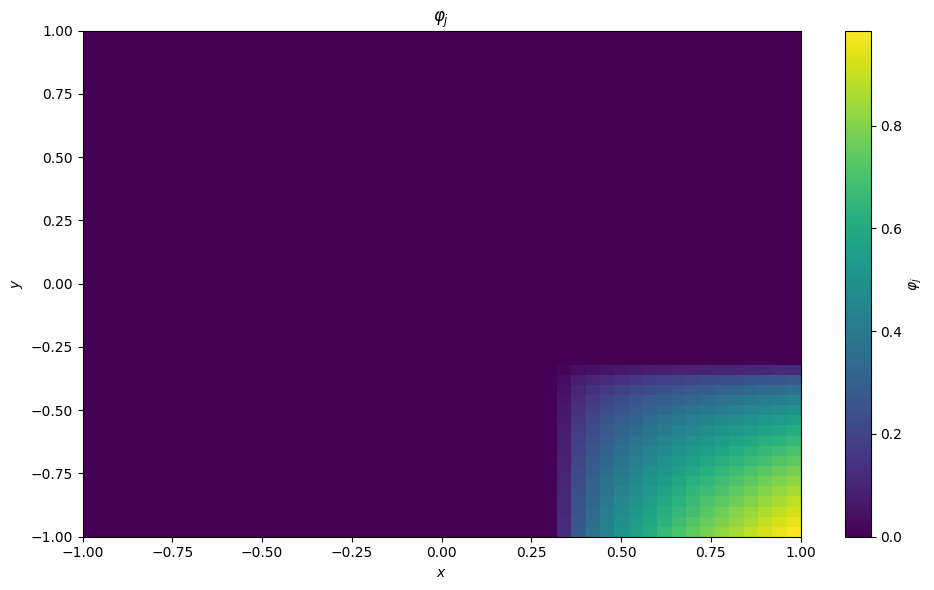

In [312]:
import torch
import matplotlib.pyplot as plt

num_pnts = 50

# Generate a grid of x and y values
x = torch.linspace(-0.99, 0.99, num_pnts)
y = torch.linspace(-0.99, 0.99, num_pnts)
X, Y = torch.meshgrid(x, y, indexing='xy')
Z = torch.empty(num_pnts, num_pnts)

# Evaluate the circuit at each point in the grid and extract the j-th component
idx = 3
for i in range(num_pnts):
    for k in range(num_pnts):
        xy = torch.tensor([X[i, k], Y[i, k]], dtype=torch.float32)
        out = circuit(xy)[idx]
        Z[i, k] = torch.tensor(out)
# Convert tensors to numpy arrays for plotting
X = X.numpy()
Y = Y.numpy()
Z = Z.numpy()

# Create a 2D heatmap plot
plt.figure(figsize=(10, 6))
plt.imshow(Z, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis', aspect='auto')

# Add labels and title
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f"$\\varphi_j$")

# Add a color bar which maps values to colors
plt.colorbar(label=f'$\\varphi_j$')

# Save the figure
plt.tight_layout()

# Show the plot
plt.show()

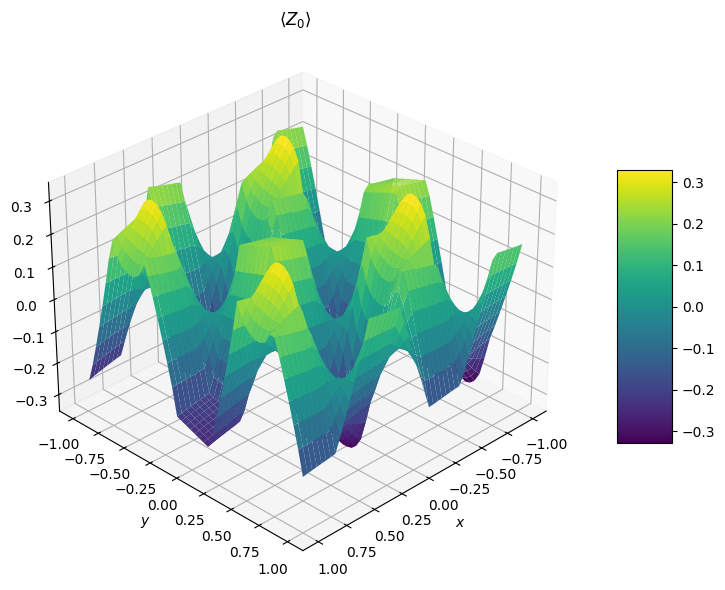

In [313]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the number of points in each dimension
num_pnts = 50

# Generate a grid of x and y values
x = torch.linspace(-0.99, 0.99, num_pnts)
y = torch.linspace(-0.99, 0.99, num_pnts)
X, Y = torch.meshgrid(x, y)
Z = torch.empty(num_pnts, num_pnts)

# Evaluate the model at each point in the grid
for i in range(num_pnts):
    for j in range(num_pnts):
        xy = torch.tensor([[X[i, j], Y[i, j]]])
        Z[i, j] = model(xy).item()

# Convert tensors to numpy arrays for plotting
X = X.numpy()
Y = Y.numpy()
Z = Z.numpy()

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title("$\langle Z_0\\rangle$")

ax.view_init(elev=30, azim=45)
# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Save the figure
plt.tight_layout()

# Show the plot
plt.show()

In [314]:
a = 0.3
b = 0.5

def lambda1(beta1, beta2):
    nom = (b-a)*(beta1-beta2)
    denom = (b-a-1)*beta2-(b-a)*beta1
    
    return nom/denom

def lambda2(beta1, beta2):
    nom = (b-a-1)*(beta1-beta2)
    denom = (b-a-1)*beta2-(b-a)*beta1
    
    return nom/denom

def effbeta(beta1, beta2):
    lam1 = lambda1(beta1, beta2)
    lam2 = lambda2(beta1, beta2)
    
    beta = beta1*(lam1+1)*(1+a-b)+beta2*(b-a)*(lam2+1)
    return beta

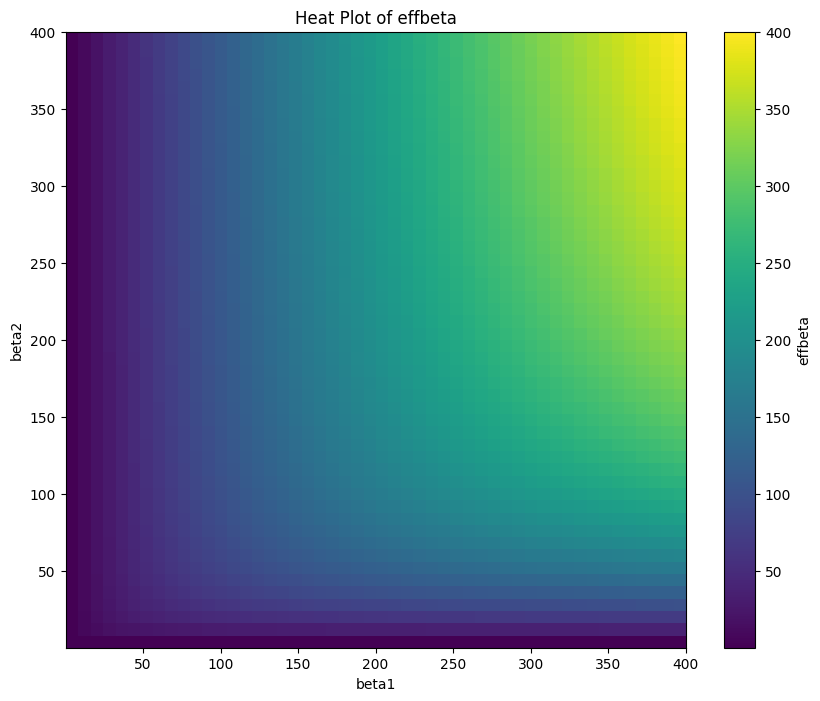

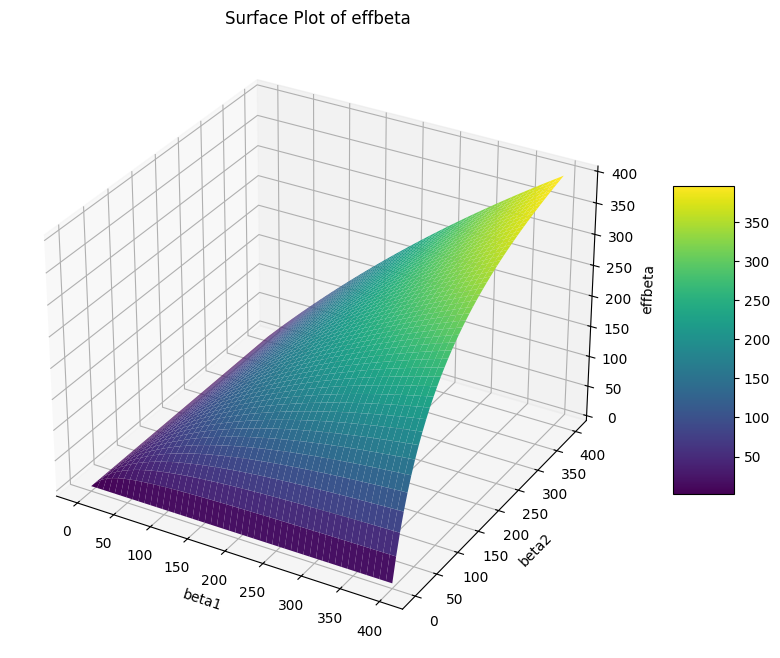

In [315]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid for the range of beta1 and beta2 values
n1 = 50
n2 = 50
beta1_range = np.linspace(0.05, 400, n1)
beta2_range = np.linspace(0.05, 400, n2)
beta1, beta2 = np.meshgrid(beta1_range, beta2_range)

# Compute effbeta for each combination of beta1 and beta2
eff_beta_values = effbeta(beta1, beta2)

# Create a heat plot
plt.figure(figsize=(10, 8))
plt.imshow(eff_beta_values, extent=(0.05, 400, 0.05, 400), origin='lower', aspect='auto')
plt.colorbar(label='effbeta')
plt.xlabel('beta1')
plt.ylabel('beta2')
plt.title('Heat Plot of effbeta')
plt.show()

# Create a surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(beta1, beta2, eff_beta_values, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('beta1')
ax.set_ylabel('beta2')
ax.set_zlabel('effbeta')
ax.set_title('Surface Plot of effbeta')
plt.show()

tensor([[-1.0000, -1.0000],
        [-0.9592, -1.0000],
        [-0.9184, -1.0000],
        [-0.8776, -1.0000],
        [-0.8367, -1.0000]])
tensor([[-1.0000],
        [-0.9990],
        [-0.9990],
        [-0.9990],
        [-0.9990]])


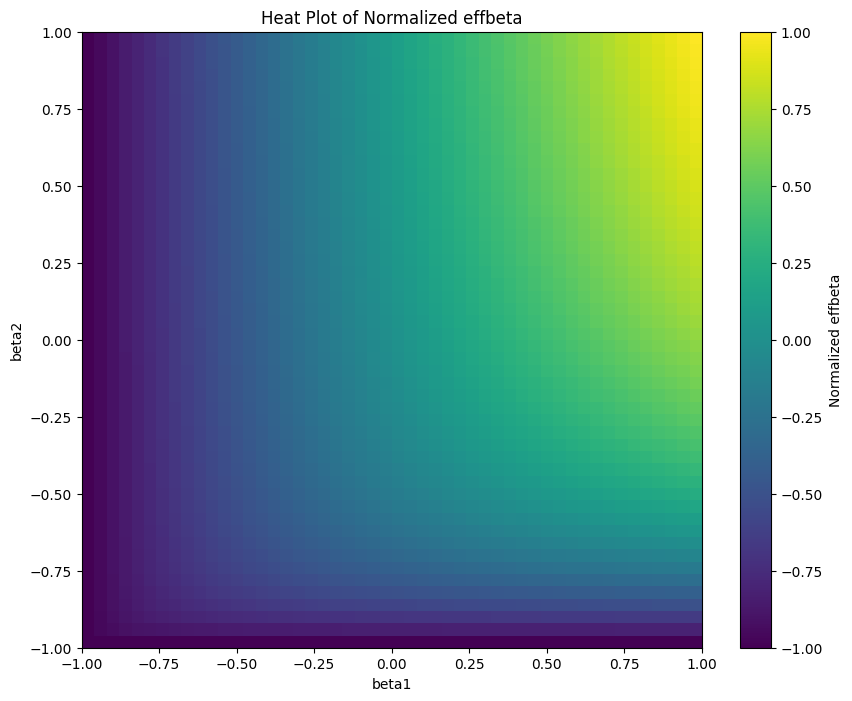

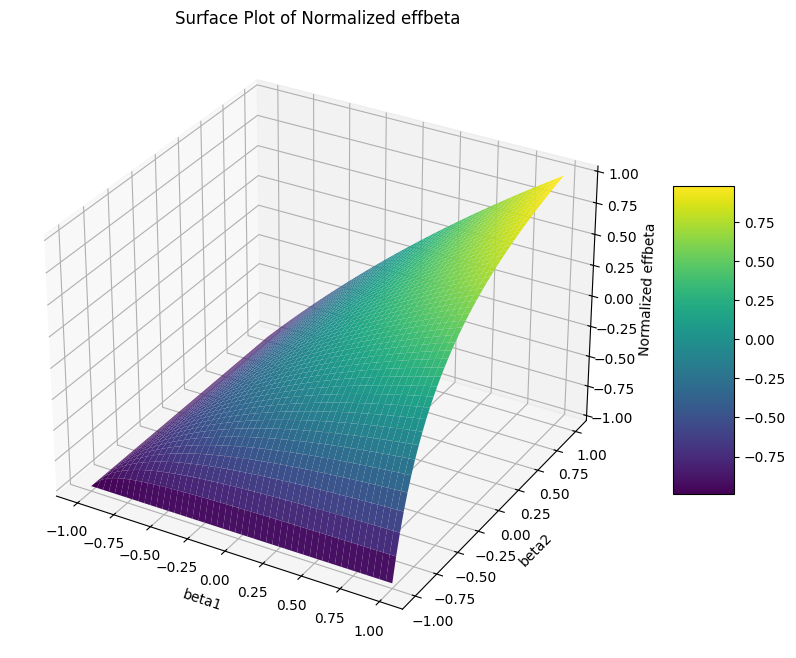

In [320]:
from torch.utils.data import DataLoader, TensorDataset, random_split
# Normalize the data to [-1, 1]
beta1_min, beta1_max = beta1.min(), beta1.max()
beta2_min, beta2_max = beta2.min(), beta2.max()
eff_beta_min, eff_beta_max = eff_beta_values.min(), eff_beta_values.max()

beta1_normalized = 2 * (beta1 - beta1_min) / (beta1_max - beta1_min) - 1
beta2_normalized = 2 * (beta2 - beta2_min) / (beta2_max - beta2_min) - 1
eff_beta_normalized = 2 * (eff_beta_values - eff_beta_min) / (eff_beta_max - eff_beta_min) - 1

# Flatten the arrays and combine them
beta1_flat = beta1_normalized.flatten()
beta2_flat = beta2_normalized.flatten()
eff_beta_flat = eff_beta_normalized.flatten()

# Convert to PyTorch tensors
inputs = torch.tensor(np.vstack((beta1_flat, beta2_flat)).T, dtype=torch.float32)
outputs = torch.tensor(eff_beta_flat, dtype=torch.float32).unsqueeze(1)

# Create a dataset and split into training and validation sets
dataset = TensorDataset(inputs, outputs)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Plot the normalized eff_beta values as a heat plot
plt.figure(figsize=(10, 8))
plt.imshow(eff_beta_normalized.reshape(beta1.shape), extent=(-1., 1., -1., 1.), origin='lower', aspect='auto')
plt.colorbar(label='Normalized effbeta')
plt.xlabel('beta1')
plt.ylabel('beta2')
plt.title('Heat Plot of Normalized effbeta')
plt.show()

# Plot the normalized eff_beta values as a surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(beta1_normalized, beta2_normalized, eff_beta_normalized, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('beta1')
ax.set_ylabel('beta2')
ax.set_zlabel('Normalized effbeta')
ax.set_title('Surface Plot of Normalized effbeta')
plt.show()

In [317]:
from qulearn.qlayer import ParallelIQPEncoding, AltRotCXLayer, HamiltonianLayer
num_features = 2
num_qubits = 6
base = 3.0
omega = 1.0
embed = ParallelIQPEncoding(wires=num_qubits,
                            num_features=num_features,
                            n_repeat=1,
                            base=base,
                            omega=omega)
n_layers = 1
var = AltRotCXLayer(wires=num_qubits, n_layers=n_layers)

obs = [qml.Identity(0), qml.PauliZ(0)]
model = HamiltonianLayer(embed, var, observables=obs)
drawer = qml.draw(model.qnode, show_all_wires=True, expansion_strategy="device")
x = torch.tensor([1.0, 2.0])
print(drawer(x))
nump = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of parameters: ", nump)

0: ──H──RZ(1.00)──╭MultiRZ(2.00)────Rot(6.03,0.47,4.18)─╭●──Rot(0.65,3.98,3.35)───
1: ──H──RZ(2.00)──╰MultiRZ(2.00)────Rot(2.78,4.74,6.11)─╰X──Rot(3.99,4.64,5.69)─╭●
2: ──H──RZ(3.00)──╭MultiRZ(18.00)───Rot(3.03,4.07,4.49)─╭●──Rot(2.15,5.80,1.15)─╰X
3: ──H──RZ(6.00)──╰MultiRZ(18.00)───Rot(4.48,1.69,2.32)─╰X──Rot(0.62,0.48,4.54)─╭●
4: ──H──RZ(9.00)──╭MultiRZ(162.00)──Rot(2.76,4.93,0.53)─╭●──Rot(4.92,1.76,4.20)─╰X
5: ──H──RZ(18.00)─╰MultiRZ(162.00)──Rot(2.12,0.28,5.54)─╰X──Rot(1.37,4.20,2.80)───

───────────────────────┤  <𝓗(0.06,-0.00)>
───Rot(2.61,5.92,1.27)─┤                 
───Rot(3.91,4.16,1.82)─┤                 
───Rot(0.27,0.18,1.47)─┤                 
───Rot(2.46,1.67,4.02)─┤                 
───────────────────────┤                 
Number of parameters:  50


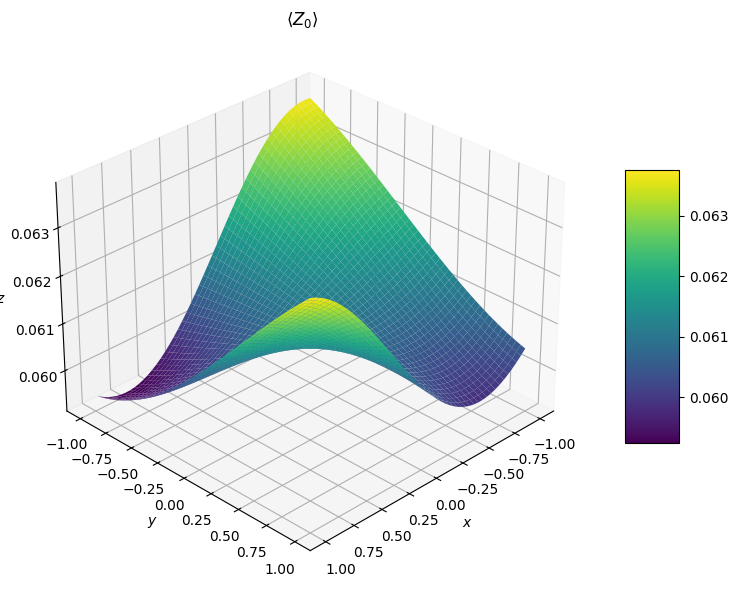

In [318]:
import torch
import matplotlib.pyplot as plt

# Define the number of points in each dimension
num_pnts = 50

# Generate a grid of x and y values
x = torch.linspace(-0.99, 0.99, num_pnts)
y = torch.linspace(-0.99, 0.99, num_pnts)
X, Y = torch.meshgrid(x, y)
Z = torch.empty(num_pnts, num_pnts)

# Evaluate the model at each point in the grid
for i in range(num_pnts):
    for j in range(num_pnts):
        xy = torch.tensor([X[i, j], Y[i, j]])
        Z[i, j] = model(xy).item()

# Convert tensors to numpy arrays for plotting
X = X.numpy()
Y = Y.numpy()
Z = Z.numpy()

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title("$\langle Z_0\\rangle$")

ax.view_init(elev=30, azim=45)
# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Save the figure
plt.tight_layout()

# Show the plot
plt.show()